In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:20.2f}'.format 

pd.set_option('display.max_column', 999)

<h1>EXPLORATION DATA ANALYSIS<h1>

In [29]:
df = pd.read_excel("F:\study_data\python project\online_retail_II.xlsx", sheet_name=0)

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [31]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [32]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


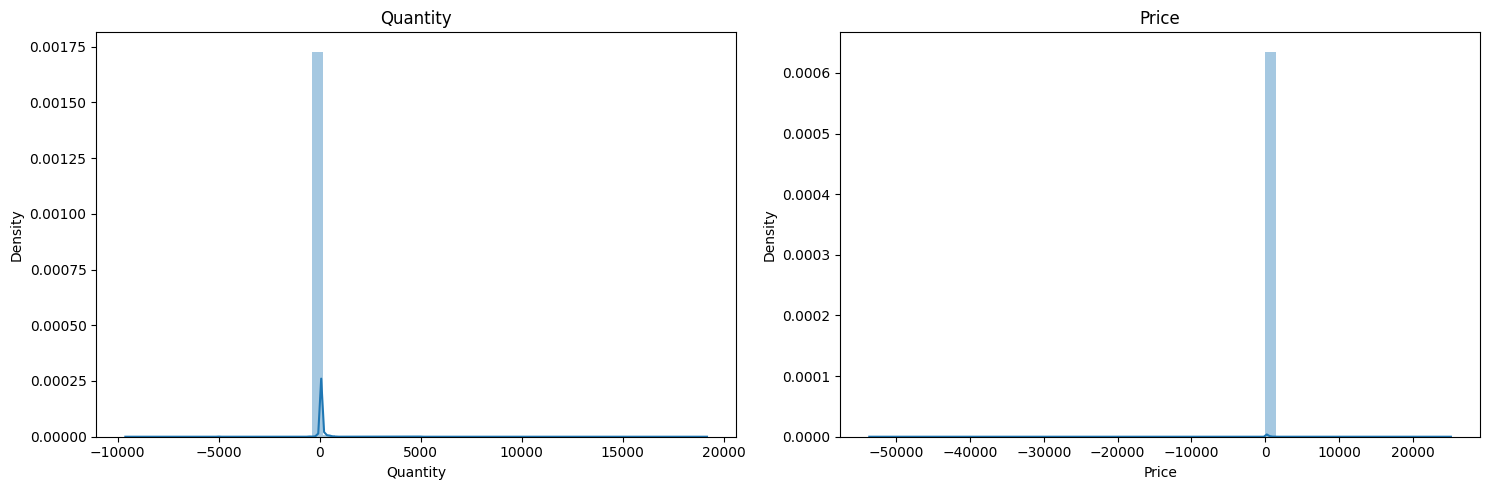

In [33]:
columns = ['Quantity', 'Price']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(columns):
    sns.distplot(df[col], ax=axes[i]) 
    axes[i].set_title(col) 

plt.tight_layout()

In [34]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [35]:
df[df["Quantity"] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


In [36]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [37]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [38]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [39]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [40]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


<H2>NOTE<H2>

StockCode được thiết kế để tuân theo mẫu [0-9]{5} nhưng dường như có các giá trị hợp lệ cho [0-9]{5}[a-zA-Z]+. Ngoài ra, nó cũng chứa các giá trị khác:
1. DCGS
- Mô tả: Có vẻ hợp lệ, một số số lượng âm và ID khách hàng là null
- Hành động: Loại trừ khỏi phân cụm
2. D
- Mô tả: Có vẻ hợp lệ, đại diện cho giá trị chiết khấu
- Hành động: Loại trừ khỏi phân cụm
3. DOT
- Mô tả: Có vẻ hợp lệ, đại diện cho phí bưu điện
- Hành động: Loại trừ khỏi phân cụm
4. M or m
- Mô tả: Có vẻ hợp lệ, đại diện cho giao dịch thủ công
- Hành động: Loại trừ khỏi phân cụm
5. C2
- Mô tả: Giao dịch vận chuyển - không chắc điều này có nghĩa gì
- Hành động: Loại trừ khỏi phân cụm
6. C3
- Mô tả: Không chắc chắn, chỉ có 1 giao dịch
- Hành động: Loại trừ khỏi phân cụm
7. BANK CHARGES or B
- Mô tả: Phí ngân hàng
- Hành động: Loại trừ khỏi phân cụm
8. S
- Mô tả: Mẫu gửi cho khách hàng
- Hành động: Loại trừ khỏi phân cụm
9. TESTXXX
- Mô tả: Dữ liệu kiểm tra, không hợp lệ
- Hành động: Loại trừ khỏi phân cụm
10. gift_XXX
- Mô tả: Mua hàng bằng thẻ quà tặng, có thể thú vị cho một phân tích khác, nhưng không có dữ liệu khách hàng
- Hành động: Loại trừ khỏi phân cụm
11. PADS
- Mô tả: Có vẻ là mã hàng hợp lệ cho đệm lót
- Action: Giữ lại
12. SP1002
- Mô tả: Có vẻ là mặt hàng yêu cầu đặc biệt, chỉ có 2 giao dịch, 3 có vẻ hợp lệ, 1 có giá 0
- Hành động: Loại trừ khỏi phân cụm
13. AMAZONFEE
- Mô tả: Có vẻ là phí vận chuyển của Amazon hoặc gì đó tương tự
- Hành động: Loại trừ khỏi phân cụm
14. ADJUSTX
- Mô tả: Điều chỉnh tài khoản thủ công bởi quản trị viên
- Hành động: Loại trừ khỏi phân cụm

<h1>DATA CLEANING<h1>

In [41]:
clean_df = df.copy()

In [42]:
clean_df["Invoice"] = clean_df["Invoice"].astype("str")

mask = (
    clean_df["Invoice"].str.match("^\\d{6}$") == True
)

clean_df = clean_df[mask]

clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [43]:
clean_df["StockCode"] = clean_df["StockCode"].astype("str")

mask = (
    (clean_df["StockCode"].str.match("^\\d{5}$") == True)
    | (clean_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (clean_df["StockCode"].str.match("PADS$") == True)
)

clean_df = clean_df[mask]

clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [44]:
clean_df.dropna(subset=["Customer ID"], inplace = True)

In [45]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [46]:
len(clean_df[clean_df["Price"] == 0])

28

In [47]:
clean_df = clean_df[clean_df["Price"] > 0]

In [48]:
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [49]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [50]:
clean_df["Price"].min()

np.float64(0.001)

In [51]:
len(clean_df)/len(df)

0.7732429238325965

Dropped about 23% of record

# FEATURE SCALING

In [52]:
clean_df["SalesLineTotal"] = clean_df["Quantity"] * clean_df["Price"]

In [53]:
aggregated_df = clean_df.groupby(by = "Customer ID", as_index=False) \
    .agg(
        MonetaryValue = ("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [54]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


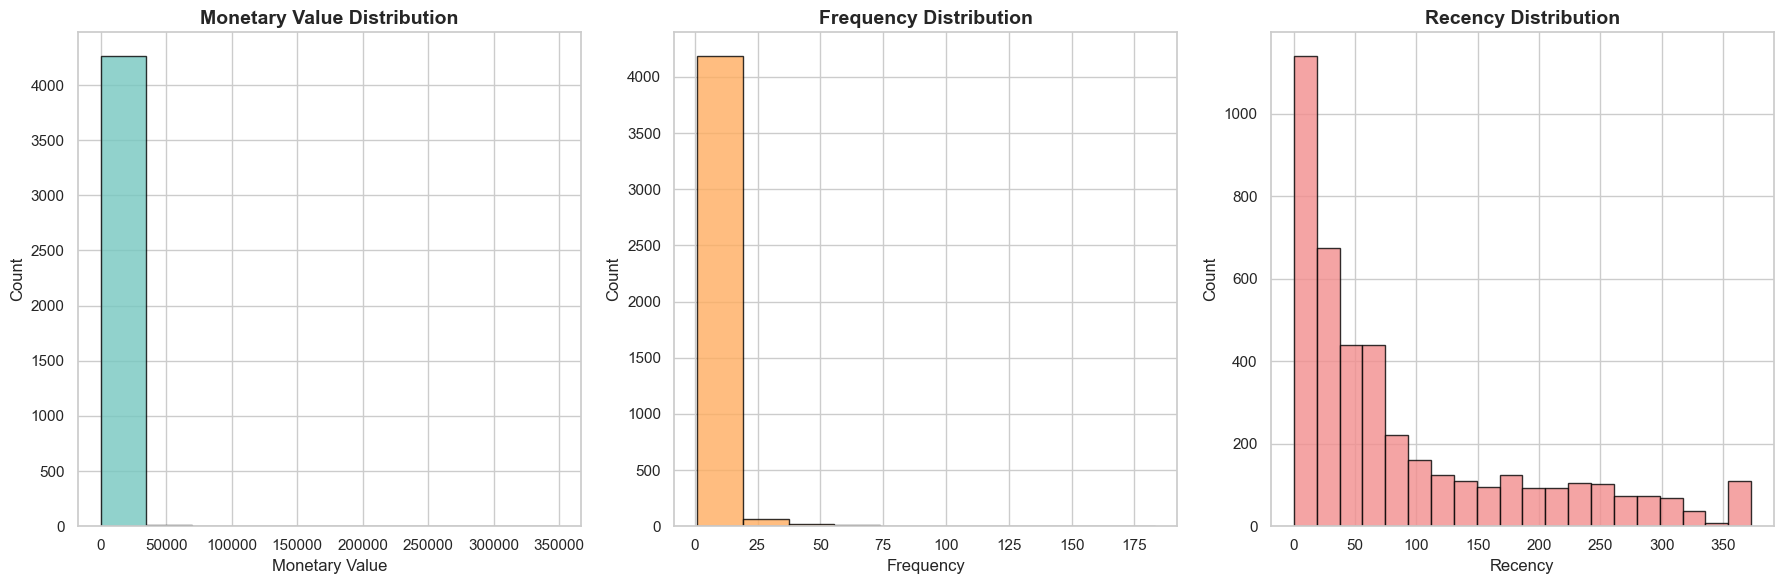

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(18, 6))

colors = ['#76c7c0', '#ffad60', '#f28e8e']

# Subplot 1: Monetary Value Distribution
plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color=colors[0], edgecolor='black', alpha=0.8)
plt.title('Monetary Value Distribution', fontsize=14, weight='bold')
plt.xlabel('Monetary Value', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Subplot 2: Frequency Distribution
plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color=colors[1], edgecolor='black', alpha=0.8)
plt.title('Frequency Distribution', fontsize=14, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Subplot 3: Recency Distribution
plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color=colors[2], edgecolor='black', alpha=0.8)
plt.title('Recency Distribution', fontsize=14, weight='bold')
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()

plt.show()

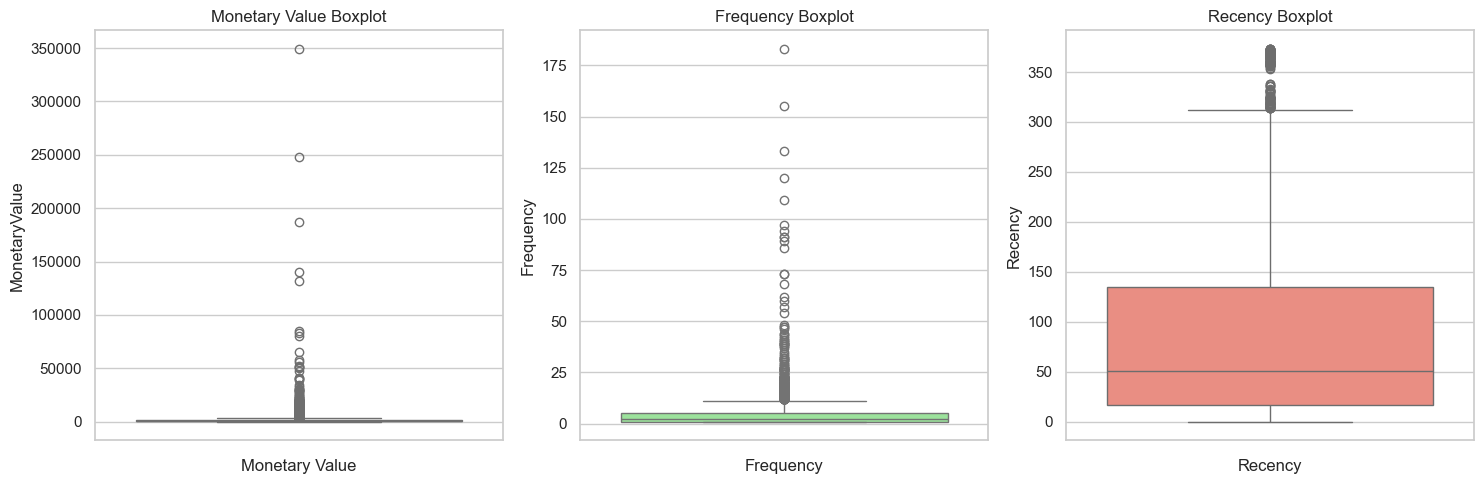

In [56]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

### SEPARATE OUTLIER

In [57]:
# Monetary Value Outliers
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [58]:
# Frequency Outliers
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [59]:
# None Outliers
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


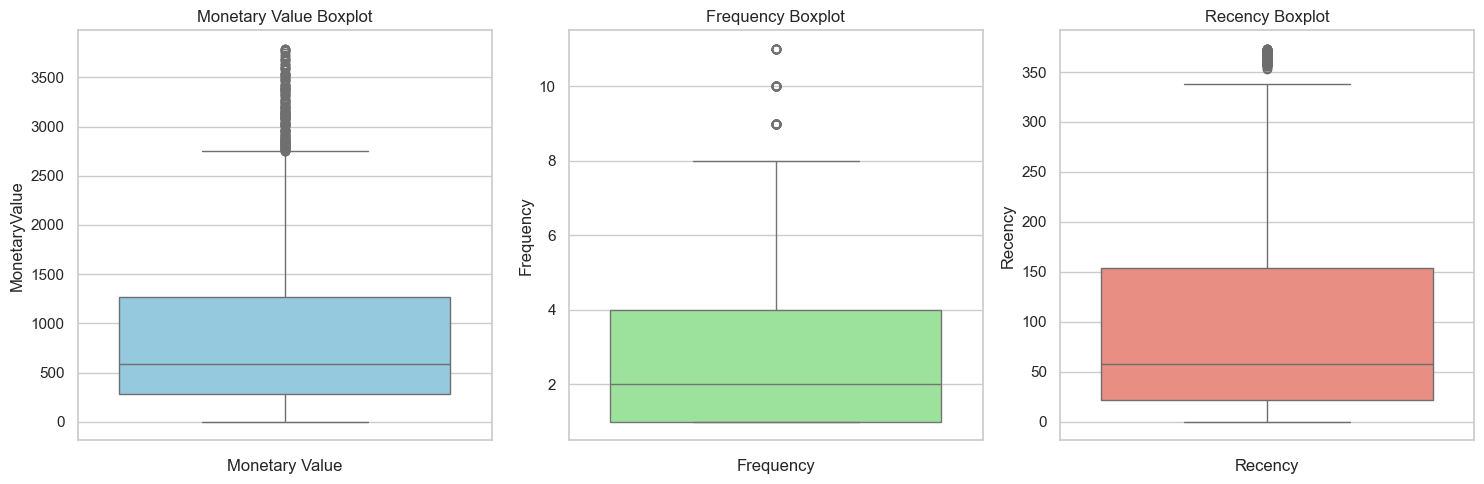

In [60]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

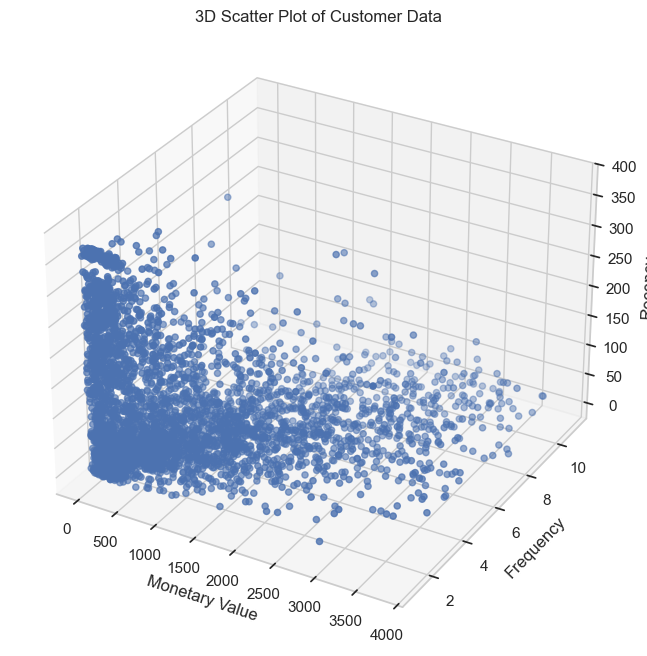

In [61]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

### STANDARD SCALING

In [62]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [63]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


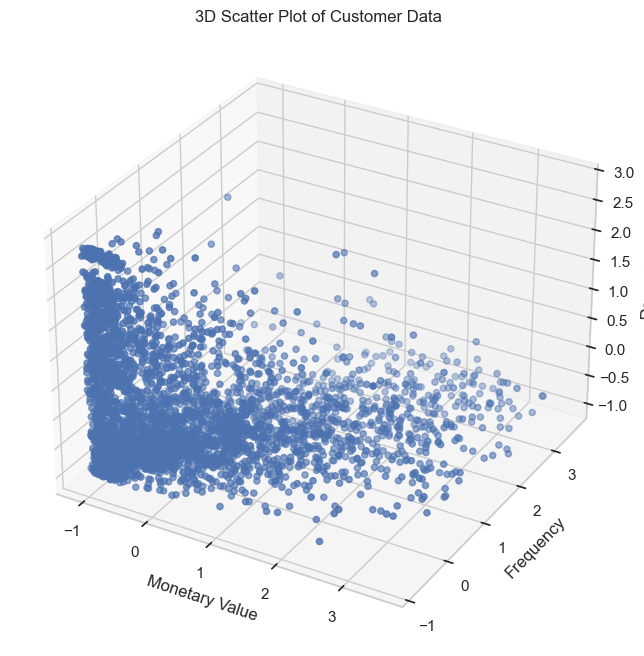

In [64]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# KMEANS CLUSTERING

### HOW DOES KMEANS CLUSTERING WORK?


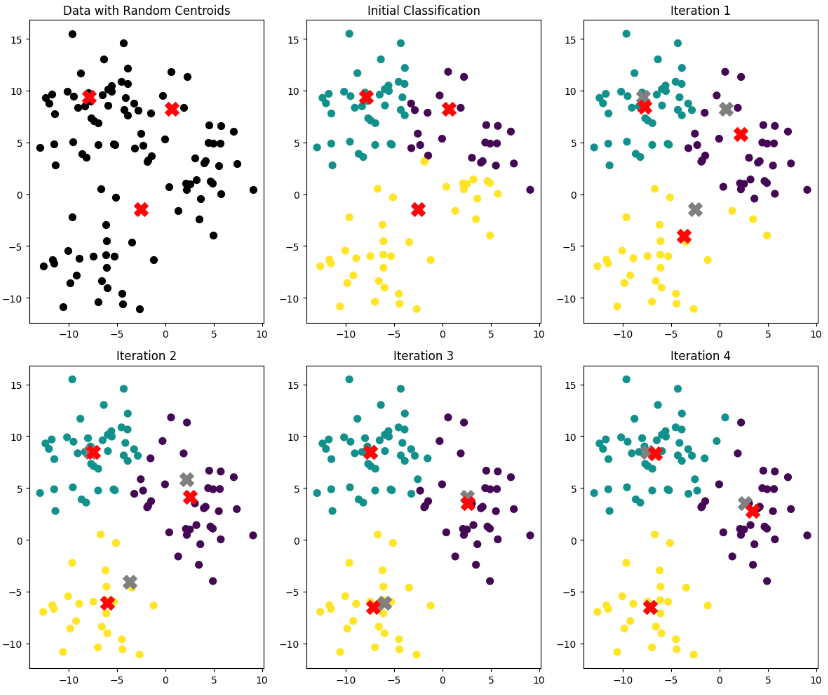

### K FOLD


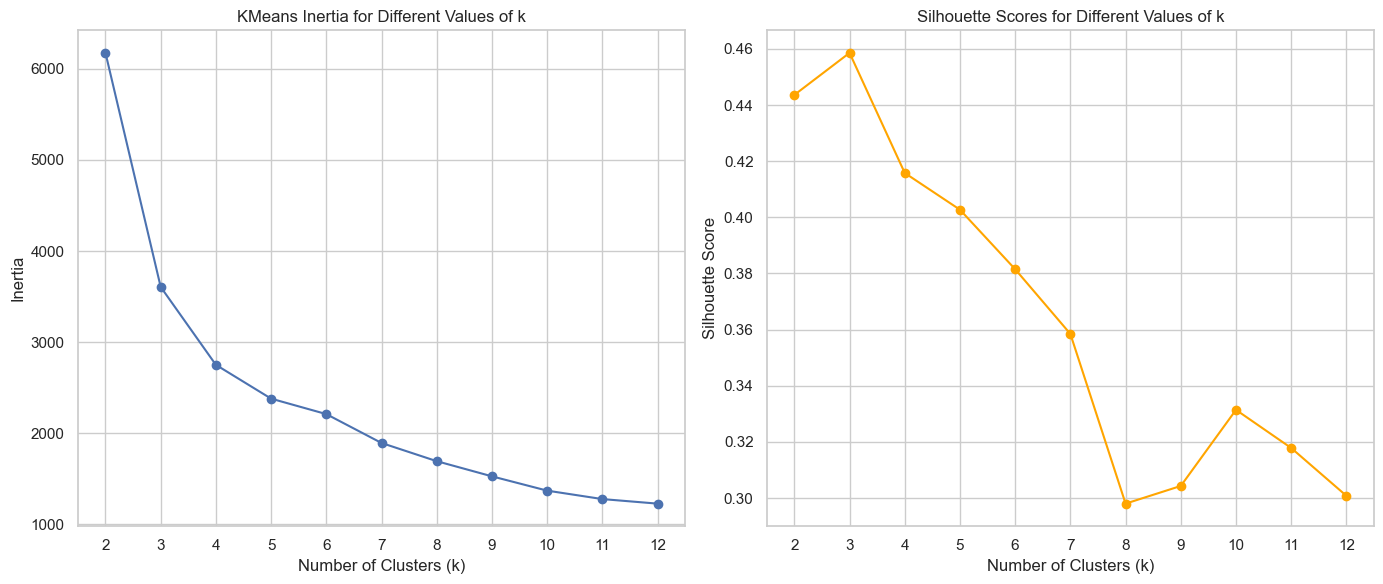

In [65]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

# Inertia test
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Silhouette test
plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

### CLUSTERING NON-OUTLIERS

In [66]:
kmeans =  KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [67]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


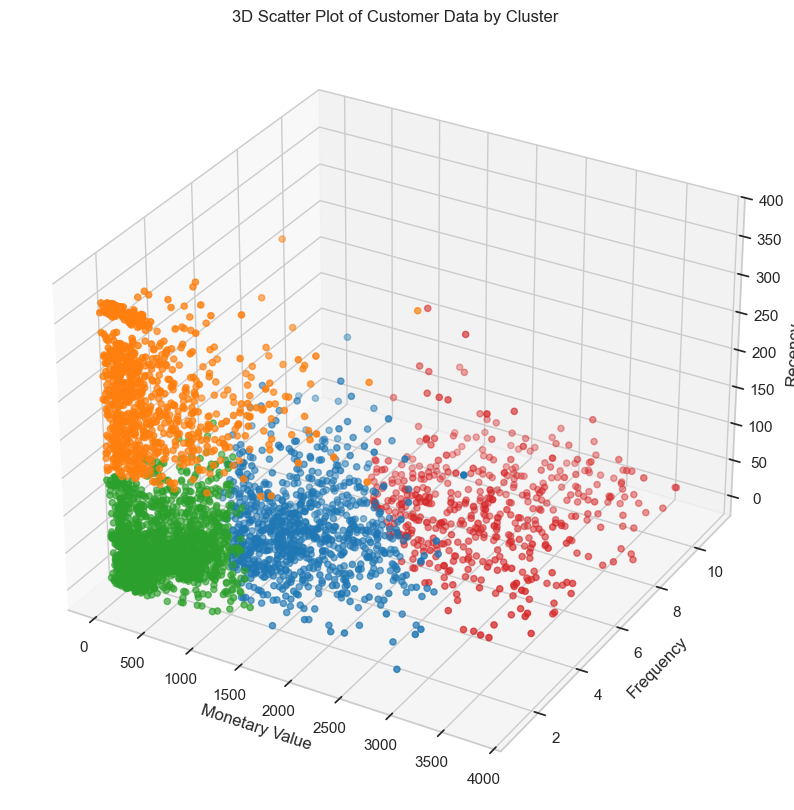

In [68]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()


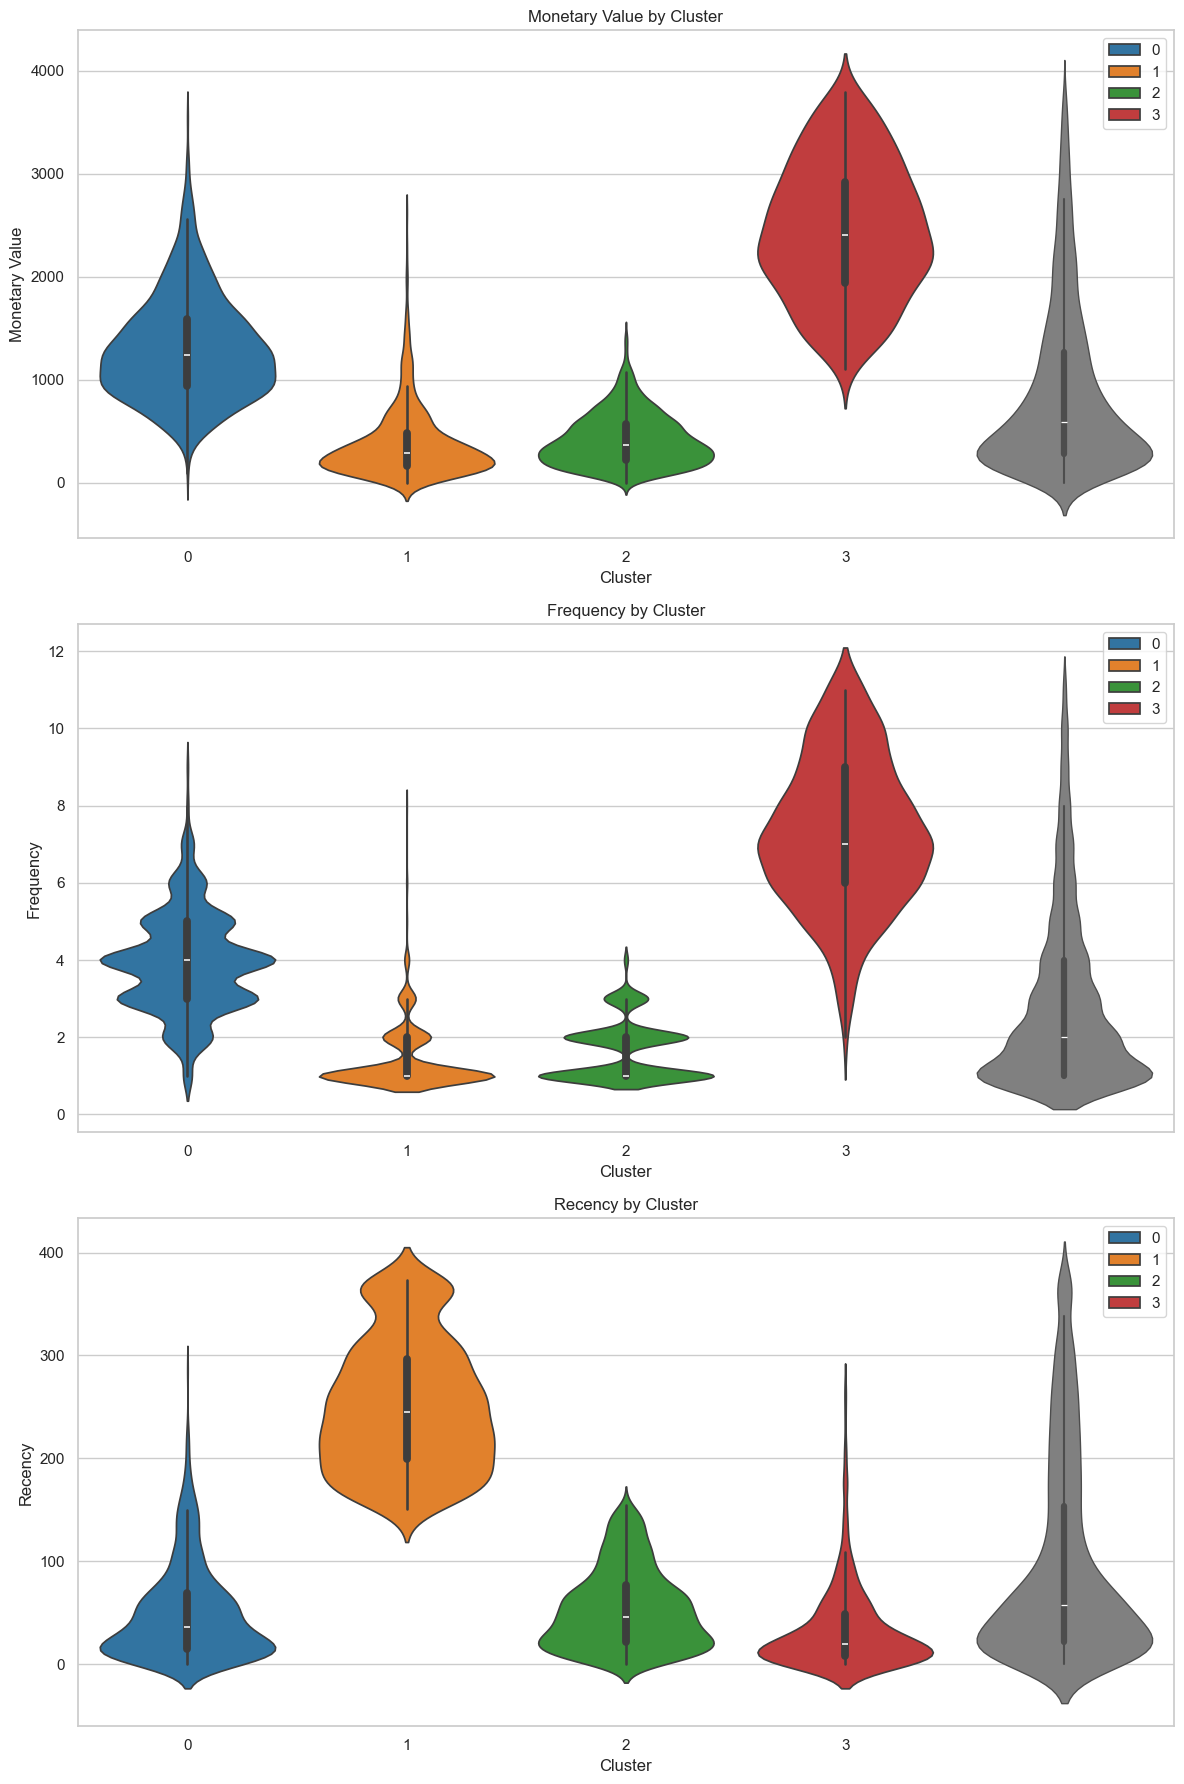

In [69]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

**INSIGHTS AND RECOMMENDATIONS**

1. Cluster 0 (Blue): "Retain"

* Rationale: Cụm này đại diện cho nhóm khách hàng có giá trị cao, thường xuyên thực hiện giao dịch nhưng không phải lúc nào cũng mua hàng gần đây. Họ có xu hướng trung thành với thương hiệu, tuy nhiên, việc giảm tần suất mua hàng gần đây có thể là dấu hiệu cho thấy sự thiếu kết nối với thương hiệu.

* Action: Để duy trì sự trung thành và khuyến khích họ tiếp tục mua sắm, nên triển khai các chương trình khách hàng thân thiết, cung cấp các ưu đãi cá nhân hóa và duy trì sự tương tác thường xuyên thông qua email, thông báo và các kênh truyền thông xã hội. Cũng nên tổ chức các sự kiện đặc biệt hoặc chương trình VIP cho họ để thể hiện sự trân trọng và khuyến khích họ mua sắm nhiều hơn.

2. Cluster 1 (Orange): "Re-Engage"

* Rationale: Nhóm này bao gồm những khách hàng có giá trị thấp hơn, không thường xuyên mua hàng và chưa thực hiện giao dịch gần đây. Sự giảm sút trong tần suất mua sắm của họ có thể cho thấy sự không hài lòng hoặc thiếu sự kết nối với thương hiệu.

* Action: Sử dụng các chiến dịch marketing mục tiêu, như các chương trình giảm giá đặc biệt, phiếu quà tặng hoặc nhắc nhở qua email để khuyến khích họ quay trở lại tiếp tục mua sắm. Các chiến dịch win-back (thu hút khách hàng quay lại) như email cá nhân hóa hoặc ưu đãi đặc biệt cho lần mua tiếp theo có thể rất hiệu quả. Đồng thời, cần phân tích kỹ lý do tại sao họ ngừng mua hàng để tinh chỉnh trải nghiệm khách hàng, tránh việc lặp lại tình trạng này. Tạo ra các re-engagement strategies thông qua social media hoặc remarketing sẽ giúp tăng cường khả năng thu hút lại nhóm khách hàng này.

3. Cluster 2 (Green): "Nurture"

* Rationale: Nhóm khách hàng này có giá trị giao dịch thấp và chưa thường xuyên mua sắm, nhưng gần đây đã có các giao dịch. Điều này cho thấy họ có thể là khách hàng mới hoặc cần thêm sự chăm sóc để gia tăng tần suất và giá trị giao dịch. Nhóm này có tiềm năng tăng trưởng nếu được nuôi dưỡng đúng cách.

* Action: Cần tập trung vào việc nurture nhóm khách hàng này để biến họ thành những khách hàng trung thành. Triển khai các chương trình onboarding chất lượng, cung cấp nội dung giáo dục về sản phẩm/dịch vụ, và sử dụng các cross-selling và up-selling techniques để tăng giá trị đơn hàng. Duy trì sự tương tác thông qua email, nhắc nhở về các ưu đãi và theo dõi các hành động của họ để cá nhân hóa trải nghiệm khách hàng một cách tốt nhất.

4. Cluster 3 (Red): "Reward"

* Rationale: Đây là nhóm khách hàng có giá trị cao nhất, với tần suất mua hàng rất thường xuyên và vẫn đang tích cực mua sắm. Họ là những khách hàng trung thành nhất của bạn và cũng là người đóng góp lớn nhất vào doanh thu. Việc giữ chân và làm hài lòng họ là yếu tố then chốt để duy trì sự ổn định và tăng trưởng doanh thu dài hạn.

* Action: Để giữ vững lòng trung thành, cần triển khai một chương trình loyalty mạnh mẽ với các phần thưởng độc quyền, ưu đãi dành riêng cho họ như early access đến các sản phẩm mới hoặc sự kiện VIP. Việc ghi nhận và tôn vinh sự trung thành của họ bằng cách cá nhân hóa trải nghiệm mua sắm, gamify các chương trình khuyến mãi, và tạo ra các mối quan hệ sâu sắc hơn thông qua việc chăm sóc đặc biệt sẽ giúp bạn duy trì nhóm khách hàng này.

### CLUSTERING OUTLIERS

In [70]:
# Tìm các chỉ số (index) mà tồn tại trong cả hai DataFrame, tức là các giá trị ngoại lệ có mặt trong cả hai tập dữ liệu
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

# Loại bỏ các ngoại lệ chồng chéo
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)

# Tạo một DataFrame cho các ngoại lệ chồng chéo
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]


monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


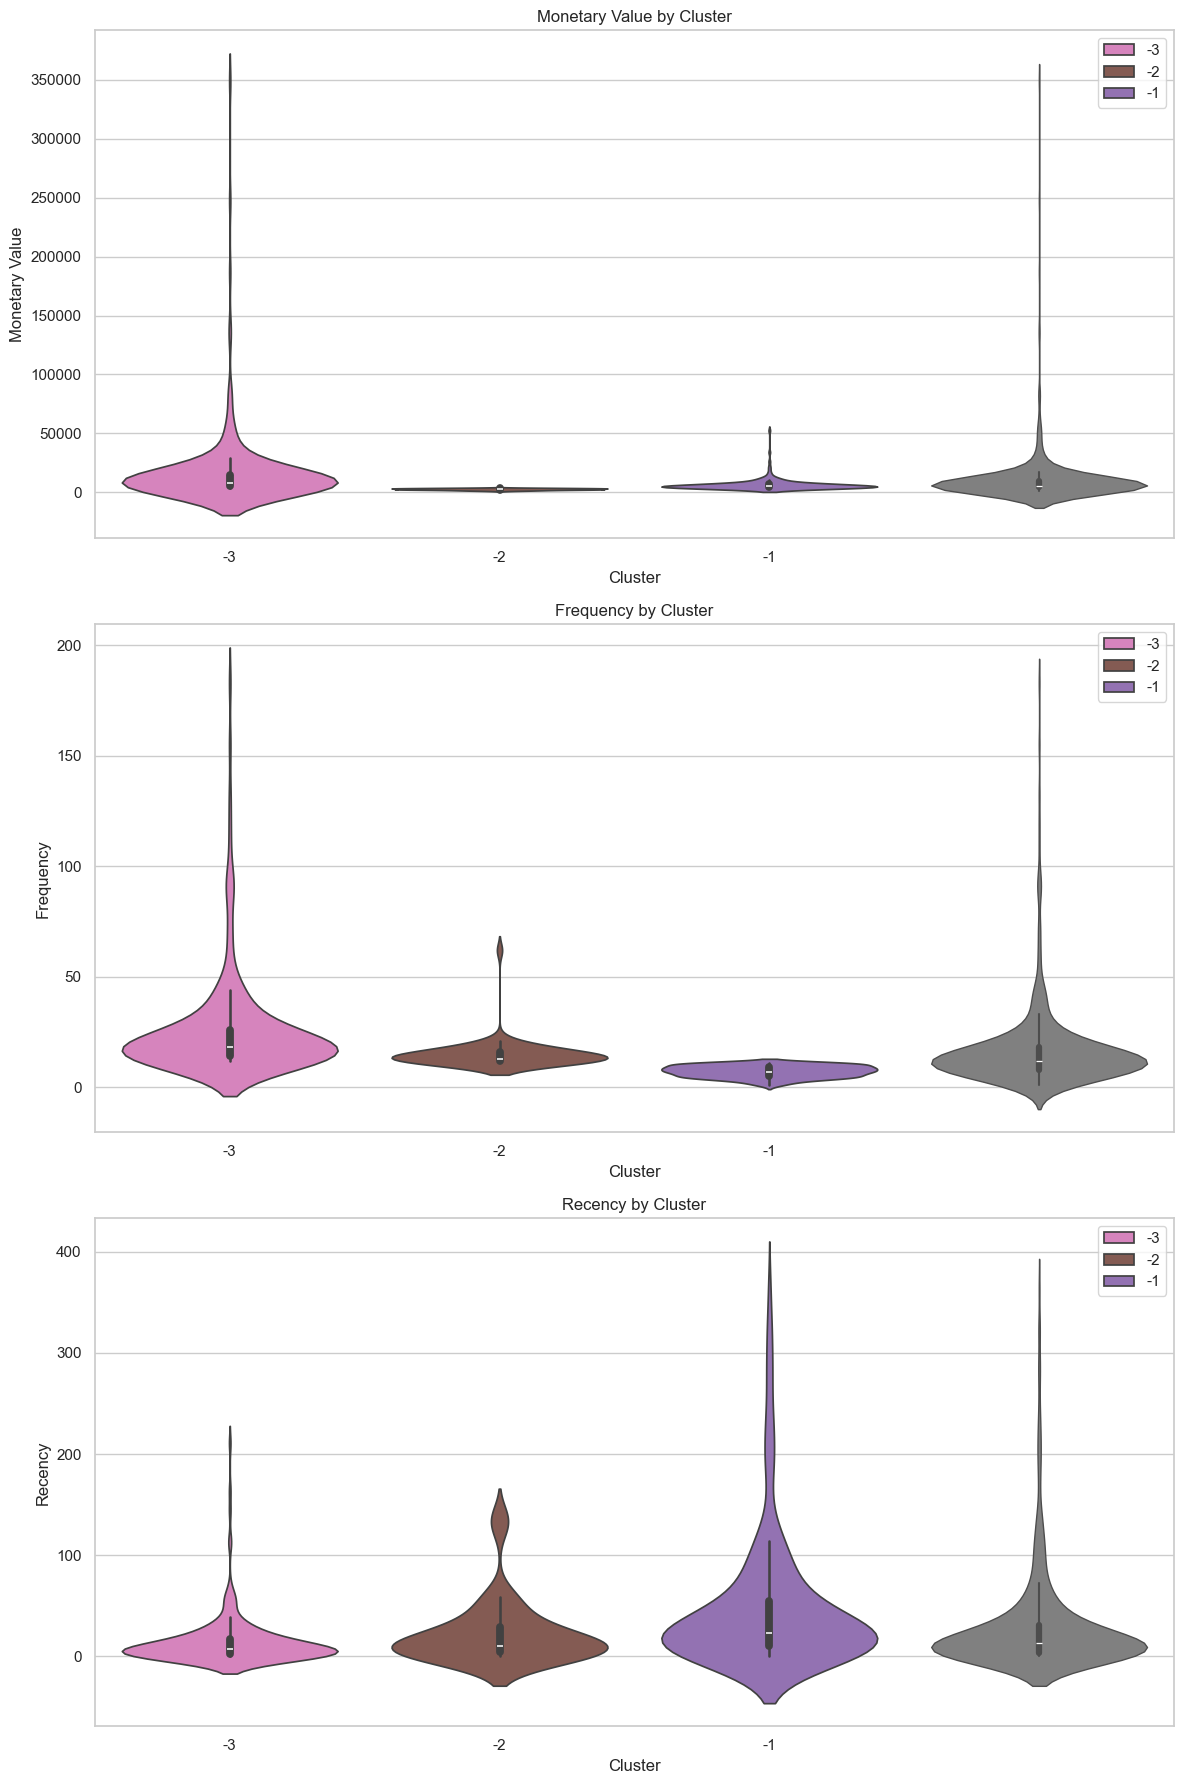

In [71]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Summary of Cluster Names:**

* Cluster -1 (Purple): Monetary Outliers - "Pamper"
* Cluster -2 (Brown): Frequency Outliers - "Upsell"
* Cluster -3 (Pink): Monetary & Frequency Outliers - "Delight"

**INSIGHTS AND RECOMMENDATIONS**

**1. Cluster -1 (Monetary Outliers) PAMPER:**
- Đặc điểm: Đây là nhóm khách hàng có chi tiêu cao nhưng không nhất thiết phải là những người mua sắm thường xuyên. Họ thực hiện các giao dịch lớn nhưng ít khi mua sắm. 
- Chiến lược tiềm năng:
    + Tăng cường duy trì lòng trung thành: Tạo ra các chương trình khách hàng thân thiết nhằm cung cấp những ưu đãi cá nhân hóa, như phiếu quà tặng hoặc giảm giá cho các sản phẩm hoặc dịch vụ cao cấp.
    + Dịch vụ cao cấp: Cung cấp trải nghiệm mua sắm độc quyền, chẳng hạn như các buổi giới thiệu sản phẩm mới hoặc các sự kiện tư nhân dành riêng cho nhóm khách hàng này.
    + Phân tích hành vi: Theo dõi hành vi mua sắm của họ để đưa ra những đề xuất cá nhân hóa hơn và tối ưu hóa cách tiếp cận của bạn với nhóm này.

**2. Cluster -2 (Frequency Outliers) UPSELL:**
- Đặc điểm: Nhóm khách hàng này là những người mua sắm thường xuyên nhưng chi tiêu ít hơn cho mỗi lần mua. Họ rất tích cực và tham gia liên tục, nhưng có thể được hưởng lợi từ các cơ hội bán thêm (upselling). 
- Chiến lược tiềm năng: 
    + Chương trình khách hàng thân thiết: Phát triển các chương trình khách hàng thân thiết để khuyến khích họ chi tiêu nhiều hơn, chẳng hạn như tích lũy điểm cho mỗi lần mua hàng hoặc tạo ra các cấp độ thành viên khác nhau với ưu đãi tăng dần.
    + Gói sản phẩm: Cung cấp các gói sản phẩm hoặc dịch vụ với giá ưu đãi nhằm khuyến khích họ chi tiêu cao hơn trong mỗi lần mua sắm.
    + Quảng bá và tiếp thị: Sử dụng các chiến dịch tiếp thị nhắm vào nhóm này để giới thiệu các sản phẩm cao cấp hoặc các sản phẩm bổ sung có thể phù hợp với những gì họ đã mua.

**3. Cluster -3 (Monetary & Frequency Outliers) DELIGHT:**
- Đặc điểm: Đây là một trong những nhóm khách hàng quan trọng nhất, có chi tiêu cực cao và mua sắm thường xuyên. Họ rất có khả năng là khách hàng hàng đầu và cần được chú ý đặc biệt.
- Chiến lược tiềm năng: 
    + Chương trình VIP: Phát triển các chương trình VIP dành riêng cho họ, bao gồm các ưu đãi đặc biệt, sự kiện độc quyền và dịch vụ chăm sóc khách hàng cá nhân hóa.
    + Khuyến mãi độc quyền: Cung cấp các ưu đãi độc quyền chỉ dành cho nhóm khách hàng này để giữ chân họ và khuyến khích họ tiếp tục mua sắm.
    + Phản hồi và cải tiến: Liên tục thu thập phản hồi từ nhóm này để cải thiện sản phẩm và dịch vụ của bạn, đồng thời đảm bảo rằng họ cảm thấy mình được coi trọng và có giá trị.

In [72]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [73]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [74]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


# VISUALIZATION

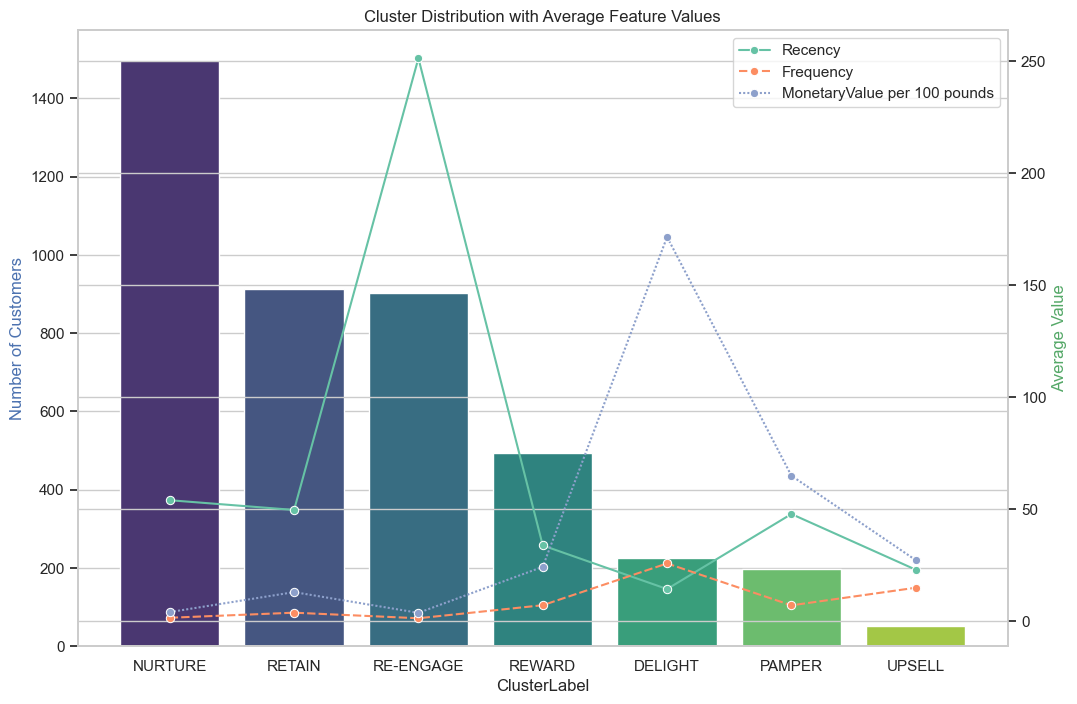

In [75]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

### Insights

**1. Phân phối khách hàng theo cụm (Cluster Distribution):**

- Nurture (Màu tím): Đây là nhóm lớn nhất với số lượng khách hàng cao nhất (hơn 1400). Nhóm này gồm những khách hàng tiềm năng đã không hoạt động trong thời gian dài, có giá trị giao dịch và tần suất thấp. Họ có thể đã chuyển hướng sang các đối thủ cạnh tranh hoặc không còn nhu cầu với sản phẩm/dịch vụ của doanh nghiệp. Điều này cho thấy có nhiều khách hàng cần được nuôi dưỡng để tăng cường sự tham gia và giá trị chi tiêu. 
- Retain (Màu xanh dương): Nhóm này cũng có số lượng khách hàng đáng kể, tuy nhiên thấp hơn nhóm Nurture. Nhóm này gồm các khách hàng vẫn đang giao dịch với doanh nghiệp, nhưng là khách hàng có giá trị nhưng không phải là khách hàng thường xuyên. Đây là nhóm khách hàng cần được tập trung giữ chân để không rơi vào tình trạng giảm tương tác.
- Re-Engage (Màu xanh lá cây): Nhóm này có sự tham gia trung bình. Những khách hàng này đã từng hoạt động nhưng hiện tại họ ít tương tác với doanh nghiệp, mặc dù họ vẫn chưa hoàn toàn "mất đi". Đây là nhóm khách hàng có tiềm năng được tái kích hoạt nếu có chiến lược phù hợp.
- Reward (Màu lục): Đây là những khách hàng có giao dịch gần đây, nhưng giá trị và tần suất mua hàng của họ không nổi bật. Đây là nhóm khách hàng trung thành cần được khuyến khích và thưởng để tiếp tục duy trì và tăng tần suất mua hàng.
- Delight (Màu xanh nhạt): Nhóm này gồm những khách hàng có giá trị giao dịch rất cao, nhưng họ không mua sắm thường xuyên. Đây là nhóm khách hàng VIP có tiềm năng, cần được chăm sóc kỹ lưỡng để duy trì và tăng cường giá trị giao dịch.
- Pamper và Upsell: Cả hai nhóm này đều cho thấy ít khách hàng, tuy nhiên đây có thể là những cơ hội cho chiến lược upselling và chăm sóc. Pamper là nhóm khách hàng có giao dịch gần đây nhưng không có đóng góp đáng kể về mặt tần suất và giá trị mua sắm. Họ cần được chăm sóc đặc biệt để thúc đẩy tần suất giao dịch và giá trị chi tiêu. Upsell là nhóm khách hàng đã ngừng giao dịch và không có đóng góp lớn về giá trị. Cần xác định xem liệu họ có còn tiềm năng để upsell hoặc tái kích hoạt hay không.

**2. Giá trị trung bình các chỉ số:**

- Recency có xu hướng cao hơn ở nhóm Re-engage, cho thấy nhóm khách hàng này đã có hoạt động gần đây nhưng khối lượng giao dịch vẫn ở mức thấp nhất cho thấy nhóm khách hàng này mặc dù rất hứng thú với sản phẩm nhưng vẫn còn do dự và chưa quyết định chi nhiều tiền. 
- Mặc dù có chỉ số Recency thấp nhất nhưng nhóm khách hàng Delgiht lại có số lượng giao dịch (Frequency) và khối lượng igao dịch trung bình (Monetary) cao nhất trong tất cả các nhóm. Vì vậy cần tập trung nâng cao khả năng quay lại thường xuyên của nhóm khách hàng này.
- Frequency và Monetary Value per 100 pounds thấp hơn trong các nhóm như Pamper và Upsell, cho thấy sự cần thiết của các chiến lược marketing để nâng cao chi tiêu của khách hàng trong các nhóm này.

### Recommendations

**1. Chiến lược cho nhóm Nurture:**
- Phát triển chương trình trung thành: Đưa ra các ưu đãi và chương trình thưởng hấp dẫn để khuyến khích khách hàng này mua sắm thường xuyên hơn. Chạy chương trình giảm giá hoặc tặng kèm sản phẩm để thu hút sự quay trở lại.
- Gửi thông điệp cá nhân hóa: Sử dụng dữ liệu để cá nhân hóa các chiến dịch marketing, hướng tới việc nâng cao giá trị chi tiêu của khách hàng. Thường xuyên liên lạc qua các kênh như email, SMS với nội dung nhấn mạnh vào các sản phẩm/dịch vụ mới.

**2. Chiến lược cho nhóm Retain:**
- Cải thiện chất lượng: Cải thiện trải nghiệm dịch vụ và tăng cường sự gắn bó của khách hàng bằng các chương trình khách hàng thân thiết.
- Chương trình khuyến mãi đặc biệt: Tạo ra các chương trình giảm giá hoặc khuyến mãi chỉ dành riêng cho nhóm này để khuyến khích họ mua sắm nhiều hơn. Tăng giá trị giao dịch qua chiến lược upsell và cross-sell, đề xuất các sản phẩm liên quan hoặc cao cấp hơn.
- Khuyến khích mua sắm theo mùa: Gửi thông báo về các sản phẩm mới hoặc chương trình khuyến mãi theo mùa để kích thích sự quan tâm và thúc đẩy doanh số đồng thời tăng tần suất giao dịch bằng cách cung cấp khuyến mãi theo mùa hoặc khuyến mại cho các lần mua hàng liên tiếp.

**3. Chiến lược cho nhóm Re-Engage:**
- Khuyến mãi trở lại: Tạo các ưu đãi đặc biệt để khuyến khích khách hàng quay lại, chẳng hạn như mã giảm giá hoặc giao hàng miễn phí cho đơn hàng đầu tiên khi họ trở lại. Cần thúc đẩy quay lại thông qua các chương trình khuyến mãi hoặc ưu đãi dành riêng cho nhóm khách hàng này.
- Đánh giá phản hồi: Gửi khảo sát để tìm hiểu lý do vì sao họ không quay lại và cải thiện các sản phẩm/dịch vụ dựa trên phản hồi đó.
- Sử dụng phân tích dữ liệu để gửi các gợi ý sản phẩm mà họ từng quan tâm hoặc đã mua trước đây. Đồng thời sử dụng chiến dịch tái kích hoạt với thông điệp cá nhân hóa, nhắc nhở về các sản phẩm họ đã bỏ qua.

**4. Chiến lược cho nhóm Reward:**
- Chương trình VIP: Phát triển chương trình VIP cho khách hàng trung thành với các ưu đãi độc quyền và trải nghiệm đặc biệt. Nâng cao trải nghiệm sau mua hàng bằng cách cung cấp các dịch vụ hậu mãi tốt hơn, như tư vấn sản phẩm, bảo hành mở rộng.
- Giải thưởng và ghi nhận: Tặng thưởng cho những khách hàng có chi tiêu cao và thường xuyên để duy trì sự hài lòng và lòng trung thành của họ. Tăng cường chăm sóc và giữ chân nhóm khách hàng này bằng chương trình khách hàng thân thiết hoặc ưu đãi độc quyền cho lần mua tiếp theo.
- Khuyến khích họ giới thiệu bạn bè bằng chương trình giới thiệu khách hàng mới.

**5. Chiến lược cho nhóm DELIGHT:**
- Cung cấp dịch vụ đặc biệt dành riêng cho nhóm khách hàng VIP như ưu đãi cá nhân hóa, dịch vụ giao hàng nhanh hoặc chương trình loyalty cao cấp.
- Upsell hoặc cross-sell các sản phẩm hoặc dịch vụ cao cấp hơn để tận dụng khả năng chi tiêu của họ.
- Thường xuyên giữ liên lạc với khách hàng bằng các chương trình trải nghiệm đặc biệt, như sự kiện VIP hoặc giảm giá cho sản phẩm mới.

**6. Chiến lược cho nhóm PAMPER:**
- Cung cấp các ưu đãi nhắm mục tiêu để tăng tần suất mua hàng, như giảm giá cho lần mua tiếp theo hoặc tặng kèm sản phẩm.
- Khuyến khích khách hàng mua thêm bằng các combo sản phẩm hoặc chương trình miễn phí giao hàng.
- Sử dụng chiến lược marketing cá nhân hóa để nhắc nhở về các sản phẩm họ có thể quan tâm.
- Chương trình khuyến mãi combo: Cung cấp các gói sản phẩm để khuyến khích khách hàng mua nhiều hơn trong mỗi lần giao dịch.

**7. Chiến lược cho nhóm Upsell:**
- Phân tích hành vi của khách hàng trong quá khứ để đề xuất sản phẩm hoặc dịch vụ phù hợp với nhu cầu của họ.
- Thực hiện chiến lược upsell với các sản phẩm hoặc dịch vụ liên quan có giá trị cao hơn.
- Tái kích hoạt khách hàng thông qua chương trình khuyến mại hấp dẫn và dịch vụ chăm sóc khách hàng đặc biệt.
- Tư vấn sản phẩm: Sử dụng nhân viên bán hàng để tư vấn và giới thiệu sản phẩm mới cho khách hàng, từ đó nâng cao giá trị đơn hàng.

